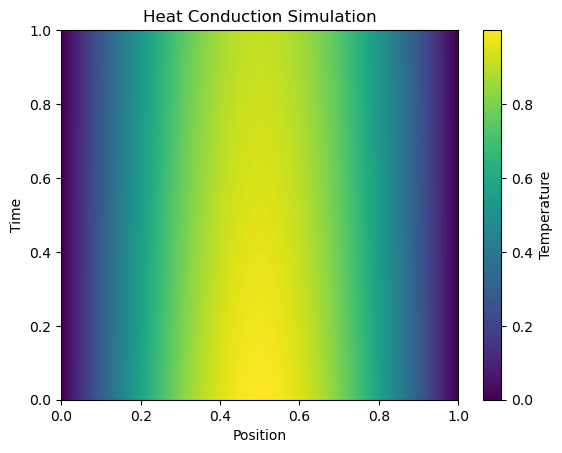

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义模拟参数
length = 1.0 # 空间长度
time = 1.0 # 时间长度
num_points = 100 # 空间离散点数
num_steps = 1000 # 时间离散步数
alpha = 0.01 # 热传导系数

# 初始化空间和时间网格
x = np.linspace(0, length, num_points)
t = np.linspace(0, time, num_steps)
dx = x[1] - x[0]
dt = t[1] - t[0]

# 初始化温度场
u = np.zeros((num_points, num_steps))
u[:, 0] = np.sin(np.pi * x) # 初始条件

# 进行数值模拟
for n in range(0, num_steps - 1):
    for i in range(1, num_points - 1):
        u[i, n + 1] = u[i, n] + alpha * dt / dx**2 * (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n])

# 绘制温度场随时间的变化
plt.imshow(u.T, origin='lower', extent=[0, length, 0, time], aspect='auto')
plt.colorbar(label='Temperature')
plt.xlabel('Position')
plt.ylabel('Time')
plt.title('Heat Conduction Simulation')
plt.show()

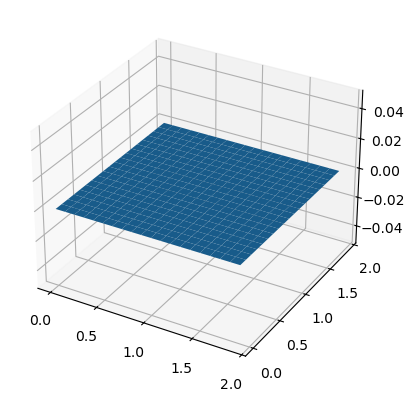

In [4]:
# -*- coding:utf-8 -*-
"""
作者：Huang jin
日期：2023年02月06日
"""
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
# 定义域大小
nx = 20
ny = 20
nz = 20
 
# 创建一个3D数组来存储温度值
T = np.zeros((nx, ny, nz))
 
# 设置初始温度值
T[:, :, 0] = 100
 
# 设置边界条件
T[:, :, 0] = 0  # 底部
T[:, :, nx - 1] = 0  # 顶部
T[:, 0, :] = 0  # 前侧
T[:, ny - 1, :] = 0  # 后侧
T[0, :, :] = 0  # 左侧
T[nx - 1, :, :] = 0  # 右侧
 
# 离散化方程
dx = 0.1
dy = 0.1
dz = 0.1
dt = 0.001
alpha = 0.01
 
# 遍历时间
for i in range(1, 1000):
    for j in range(1, nx - 1):
        for k in range(1, ny - 1):
            for l in range(1, nz - 1):
                # 对温度进行更新，这里使用了显式Euler方法
                T[j, k, l] = T[j, k, l] + alpha * (
                    T[j + 1, k, l] + T[j - 1, k, l] - 2 * T[j, k, l]) * dt / dx ** 2 + alpha * (
                    T[j, k + 1, l] + T[j, k - 1, l] - 2 * T[j, k, l]) * dt / dy ** 2 + alpha * (
                    T[j, k, l + 1] + T[j, k, l - 1] - 2 * T[j, k, l]) * dt / dz ** 2
 
# 绘制结果
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(0, nx * dx, dx), np.arange(0, ny * dy, dy))
ax.plot_surface(X, Y, T[:, :, 0])
plt.show()